In [12]:
%matplotlib notebook

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML

In [2]:
meteorite_df = pd.read_csv("landing_data_clean.csv")

In [3]:
pop_df = pd.read_csv("population_data.csv")

In [4]:
pop_met_df = pd.read_csv("merged_data.csv")

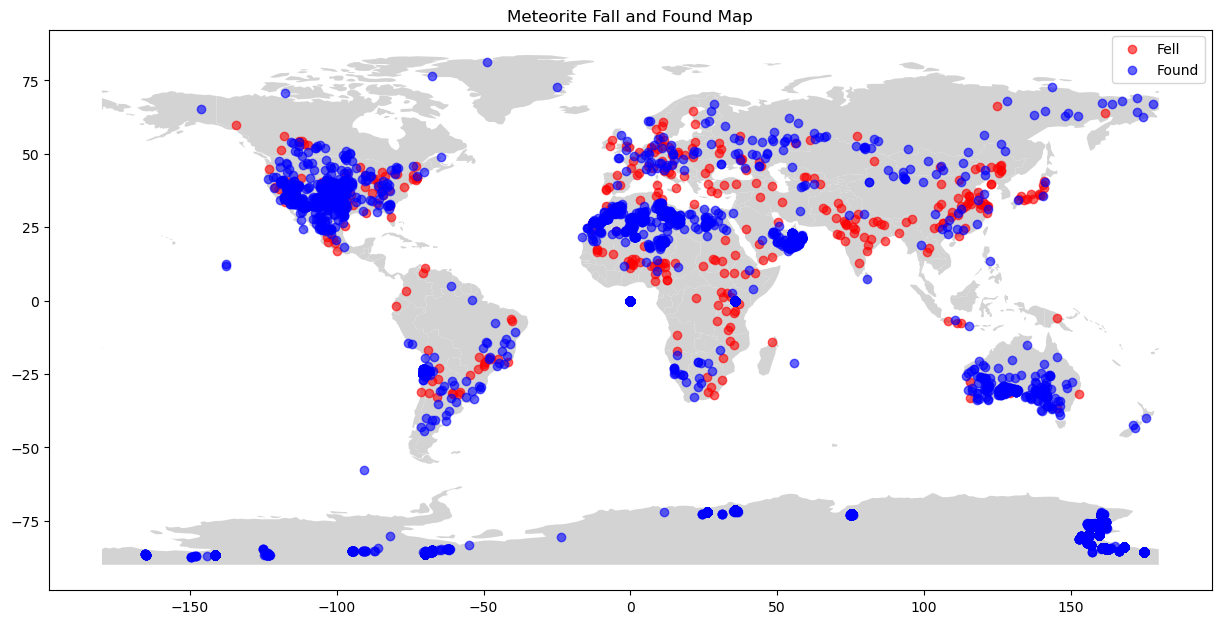

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile using your custom path
world_shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(world_shapefile_path)

# Load meteorite data and convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    meteorite_df, 
    geometry=gpd.points_from_xy(meteorite_df['longitude'], meteorite_df['latitude'])
)

# Separate 'fell' and 'found' meteorites
fell = gdf[gdf['fall'] == 'Fell']
found = gdf[gdf['fall'] == 'Found']

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot the world map
fell.plot(ax=ax, color='red', label='Fell', alpha=0.6)  # Plot 'fell' meteorites
found.plot(ax=ax, color='blue', label='Found', alpha=0.6)  # Plot 'found' meteorites

# Add legend and title
plt.legend()
plt.title("Meteorite Fall and Found Map")
plt.show()


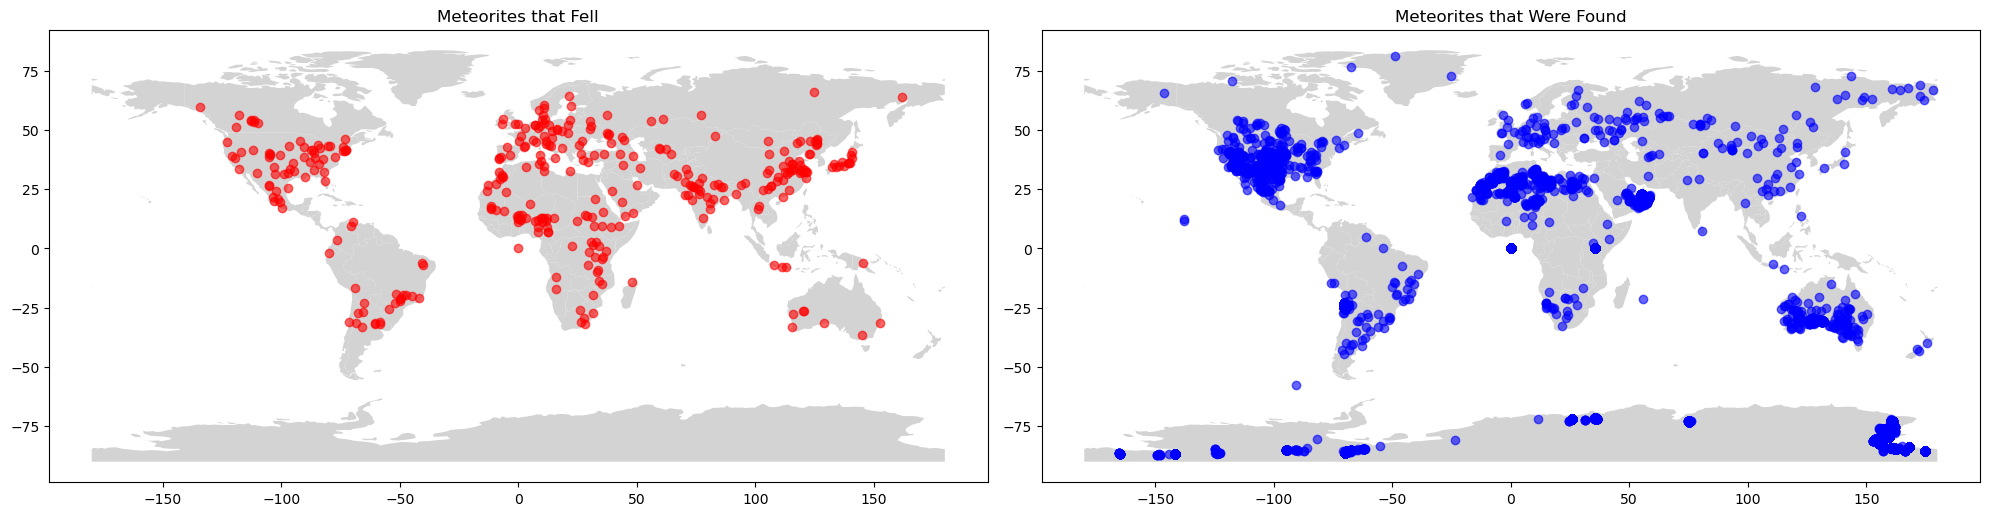

In [6]:
# Create subplots for separate maps
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 'fell' meteorites
world.plot(ax=axes[0], color='lightgrey')  # Plot the world map
fell.plot(ax=axes[0], color='red', alpha=0.6)  # Plot 'fell' meteorites
axes[0].set_title("Meteorites that Fell")

# Plot 'found' meteorites
world.plot(ax=axes[1], color='lightgrey')  # Plot the world map
found.plot(ax=axes[1], color='blue', alpha=0.6)  # Plot 'found' meteorites
axes[1].set_title("Meteorites that Were Found")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [7]:
world.rename(columns={'ADMIN': 'name'}, inplace=True) 

In [8]:
# Names of some of the countries are not the same in the map and the population data so they need to be remapped first
name_mapping = {
    "Russian Federation": "Russia",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Bahamas": "The Bahamas",
    "Côte d'Ivoire": "Ivory Coast",
    "Dem. Rep. of the Congo": "Democratic Republic of the Congo",
    "Republic of Moldova": "Moldova",
    "Republic of Korea": "South Korea",
    "Serbia": "Republic of Serbia",
    "Congo": "Republic of the Congo",
    "Viet Nam": "Vietnam",
    "China, Taiwan Province of China": "Taiwan",
    "Dem. People's Rep. of Korea": "North Korea",
    "Brunei Darussalam": "Brunei",
    "State of Palestine": "Palestine",
    "Falkland Islands (Malvinas)": "Falkland Islands",
    "Lao People's Dem. Republic": "Laos",
    "Timor-Leste": "East Timor",
    "Kosovo (under UNSC res. 1244)": "Kosovo",
    "Eswatini": "eSwatini",
    "Syrian Arab Republic": "Syria",
    "Iran (Islamic Republic of)": "Iran",
    "Türkiye": "Turkey"
}

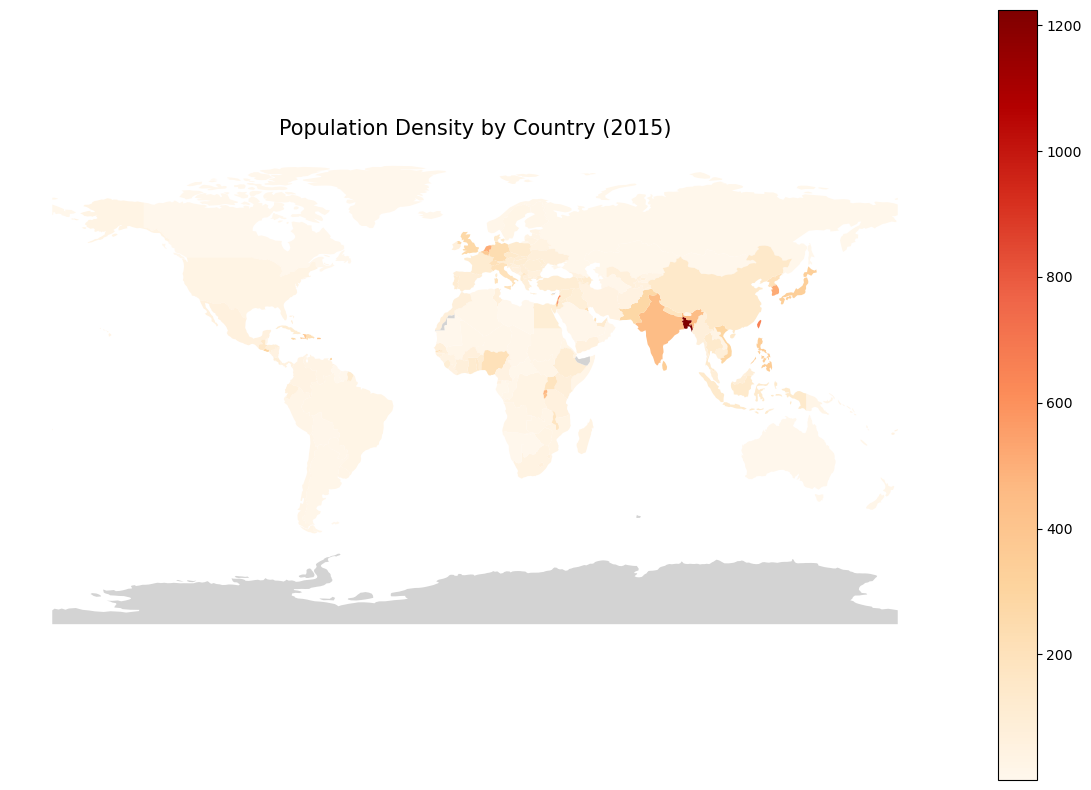

In [9]:
# Create a subset of the population density DataFrame for 2015
population_density = pop_df[['Location', '2015']].copy()

# Rename columns for consistency
population_density.rename(columns={'Location': 'name', '2015': 'population_density'}, inplace=True)
population_density['name'] = population_density['name'].replace(name_mapping)
# Merge with the world GeoDataFrame
world_merged = world.merge(population_density, on='name', how='left')

# Plot the population density on the map
fig, ax = plt.subplots(figsize=(15, 10))
world_merged.plot(column='population_density', ax=ax, legend=True, cmap='OrRd', 
                  missing_kwds={"color": "lightgrey", "label": "No Data"})
ax.set_title('Population Density by Country (2015)', fontsize=15)
ax.axis('off')

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_27708\2096115814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_2015.rename(columns={'2015': 'population_density'}, inplace=True)


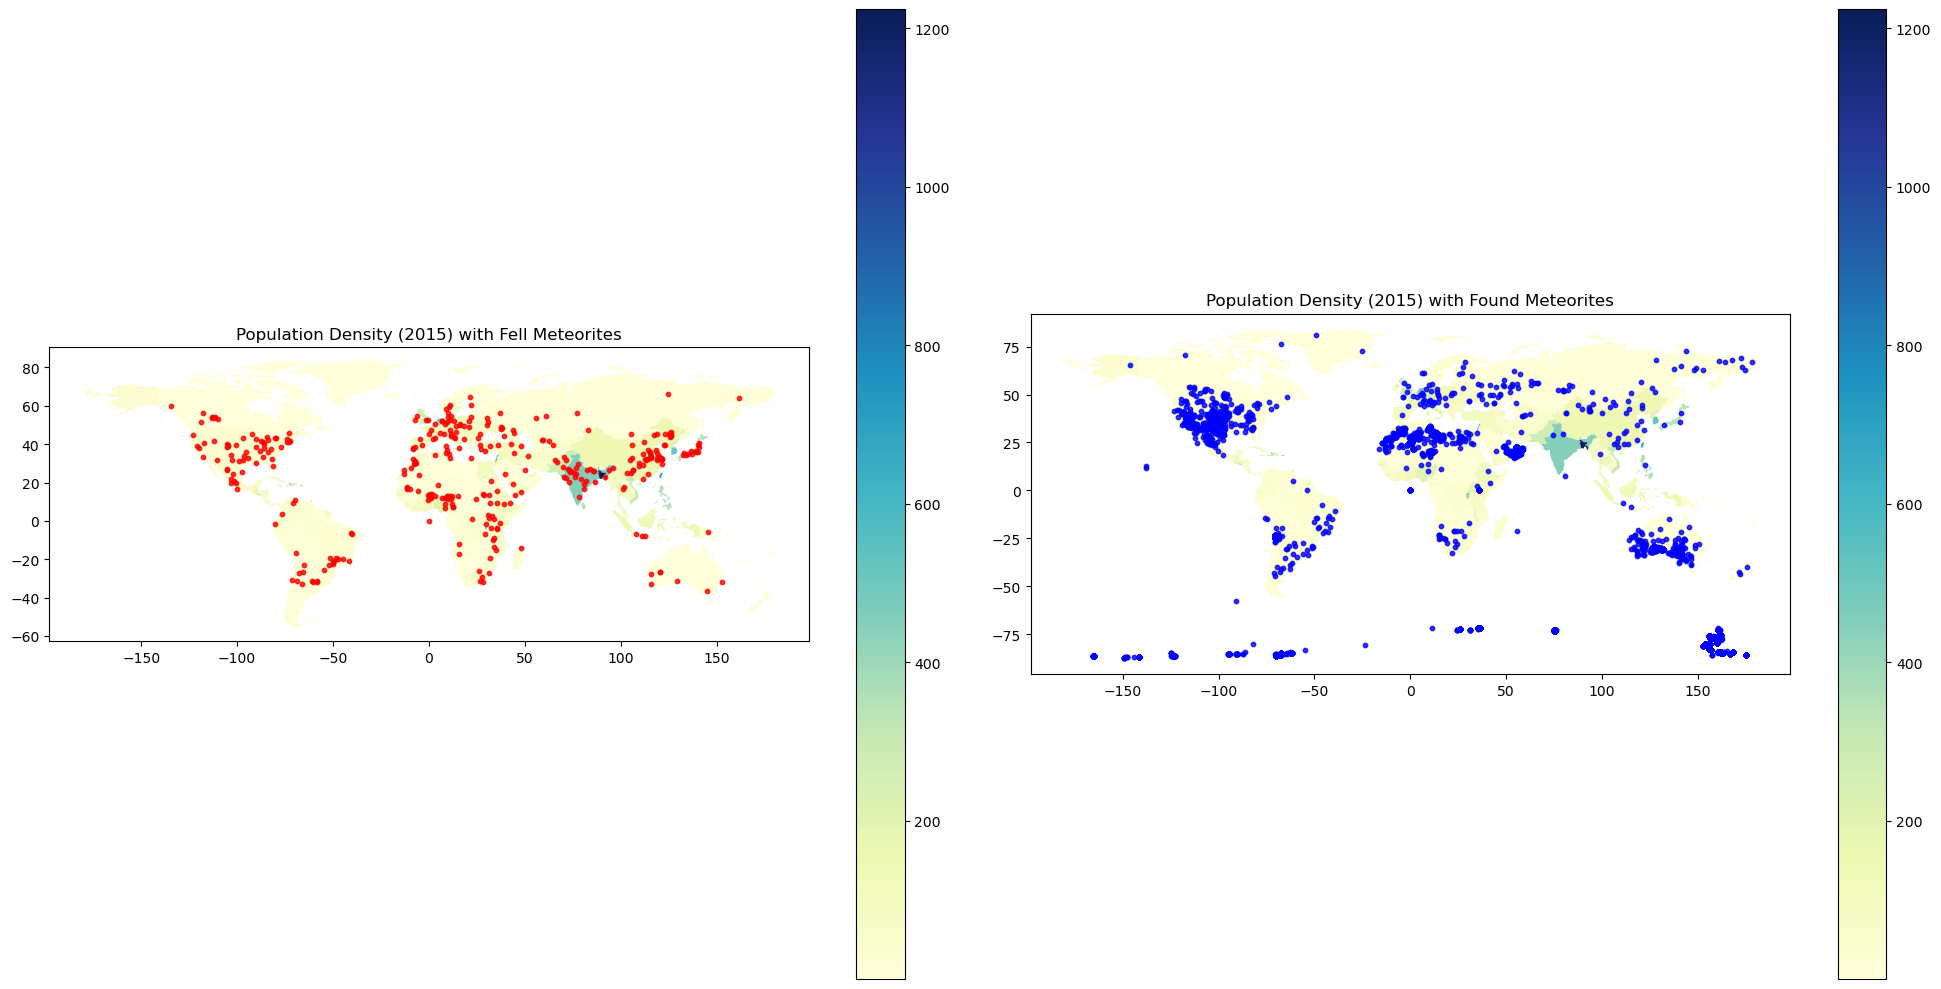

In [10]:
# Filter population density for 2015
merged_2015 = pop_met_df[['name', 'latitude', 'longitude', 'mass', 'fall', '2015']]
merged_2015.rename(columns={'2015': 'population_density'}, inplace=True)

# Separate the meteorites into "fell" and "found"
fell = merged_2015[merged_2015['fall'] == 'Fell']
found = merged_2015[merged_2015['fall'] == 'Found']

# Create subplots for population density with "fell" and "found" meteorites
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot population density heatmap with "fell" meteorites
world_merged.plot(column='population_density', cmap='YlGnBu', legend=True, ax=axes[0])
gdf_fell = gpd.GeoDataFrame(fell, geometry=gpd.points_from_xy(fell.longitude, fell.latitude))
gdf_fell.plot(ax=axes[0], color='red', markersize=10, alpha=0.8)
axes[0].set_title("Population Density (2015) with Fell Meteorites")

# Plot population density heatmap with "found" meteorites
world_merged.plot(column='population_density', cmap='YlGnBu', legend=True, ax=axes[1])
gdf_found = gpd.GeoDataFrame(found, geometry=gpd.points_from_xy(found.longitude, found.latitude))
gdf_found.plot(ax=axes[1], color='blue', markersize=10, alpha=0.8)
axes[1].set_title("Population Density (2015) with Found Meteorites")

# Adjust layout and display
plt.tight_layout()
plt.show()


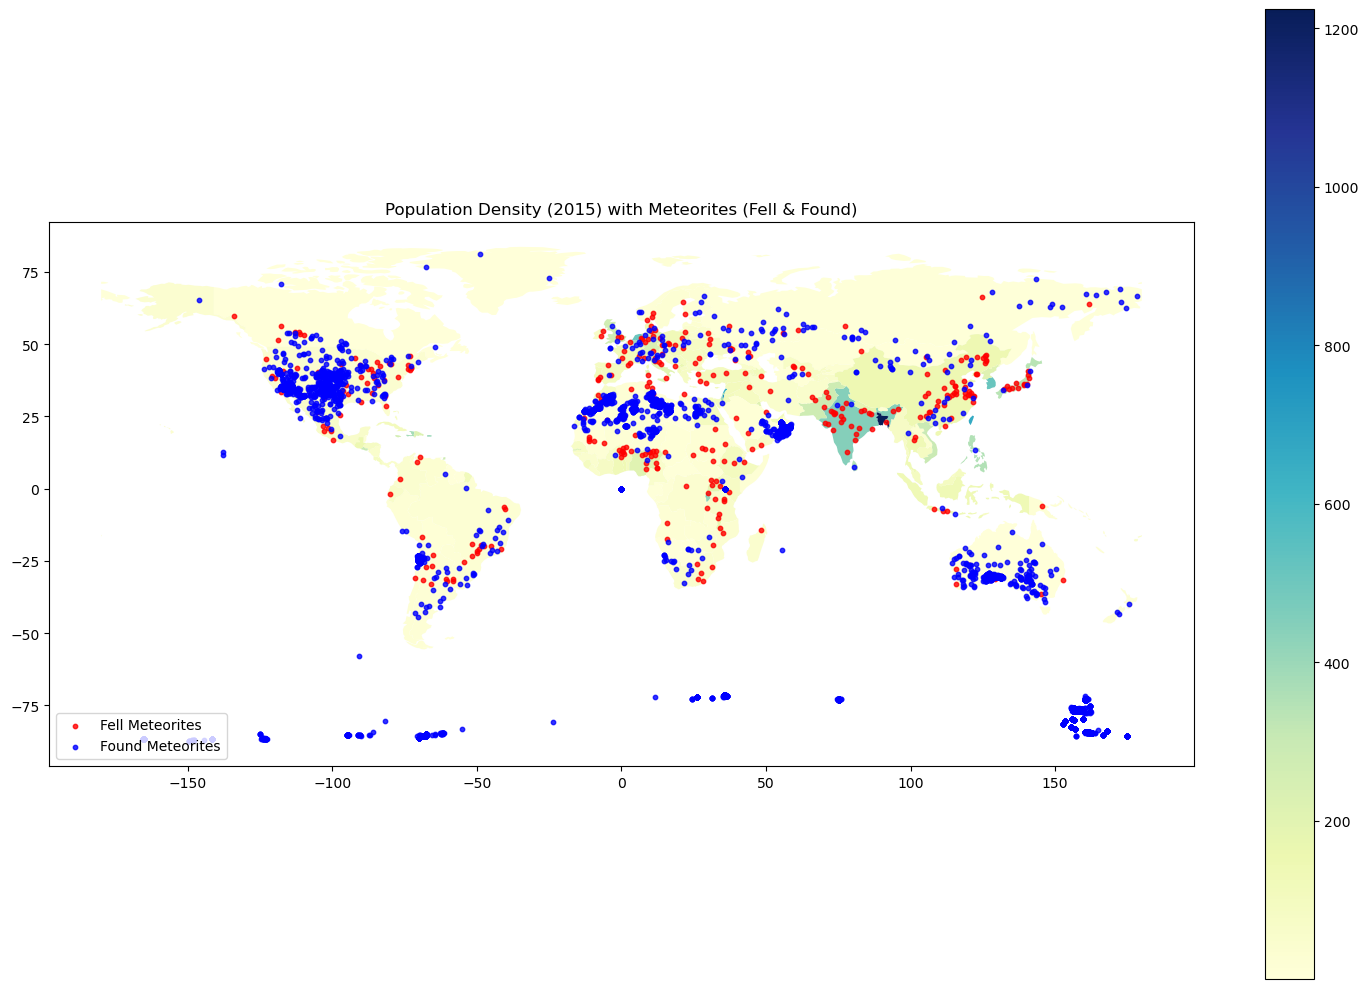

In [11]:
# Create a single plot for merged data
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the population density heatmap
world_merged.plot(column='population_density', cmap='YlGnBu', legend=True, ax=ax)

# Add "fell" meteorites as red dots
gdf_fell = gpd.GeoDataFrame(fell, geometry=gpd.points_from_xy(fell.longitude, fell.latitude))
gdf_fell.plot(ax=ax, color='red', markersize=10, alpha=0.8, label="Fell Meteorites")

# Add "found" meteorites as blue dots
gdf_found = gpd.GeoDataFrame(found, geometry=gpd.points_from_xy(found.longitude, found.latitude))
gdf_found.plot(ax=ax, color='blue', markersize=10, alpha=0.8, label="Found Meteorites")

# Add title and legend
ax.set_title("Population Density (2015) with Meteorites (Fell & Found)")
ax.legend(loc="lower left")

# Show the plot
plt.tight_layout()
plt.show()


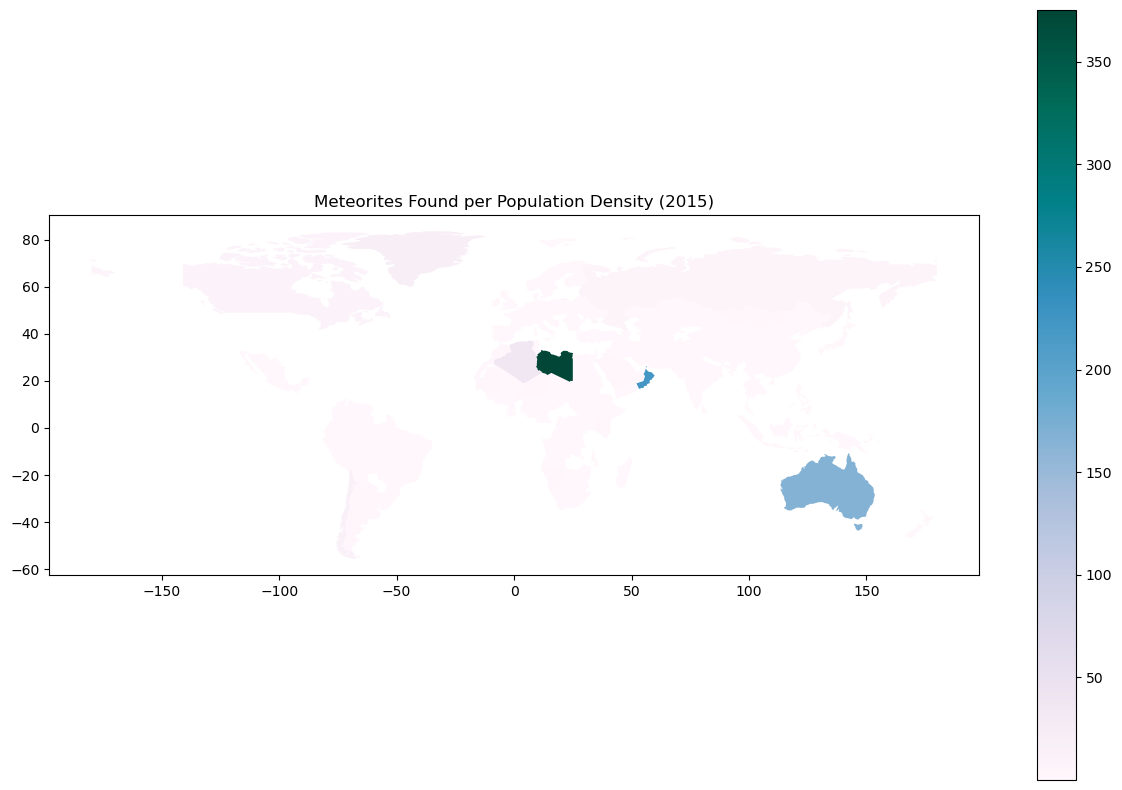

In [12]:
# Calculate number of meteorites found per country
meteorites_per_country = pop_met_df.groupby('country').size().reset_index(name='num_meteorites')

# Merge with population density
population_density = pop_met_df[['country', '2015']].drop_duplicates()
rate_df = meteorites_per_country.merge(population_density, on='country', how='left')
rate_df['rate'] = rate_df['num_meteorites'] / rate_df['2015']

# Merge with world shapefile
world = world.merge(rate_df, left_on='name', right_on='country', how='left')

# Plot rate
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='rate', cmap='PuBuGn', legend=True, ax=ax)
plt.title("Meteorites Found per Population Density (2015)")
plt.show()


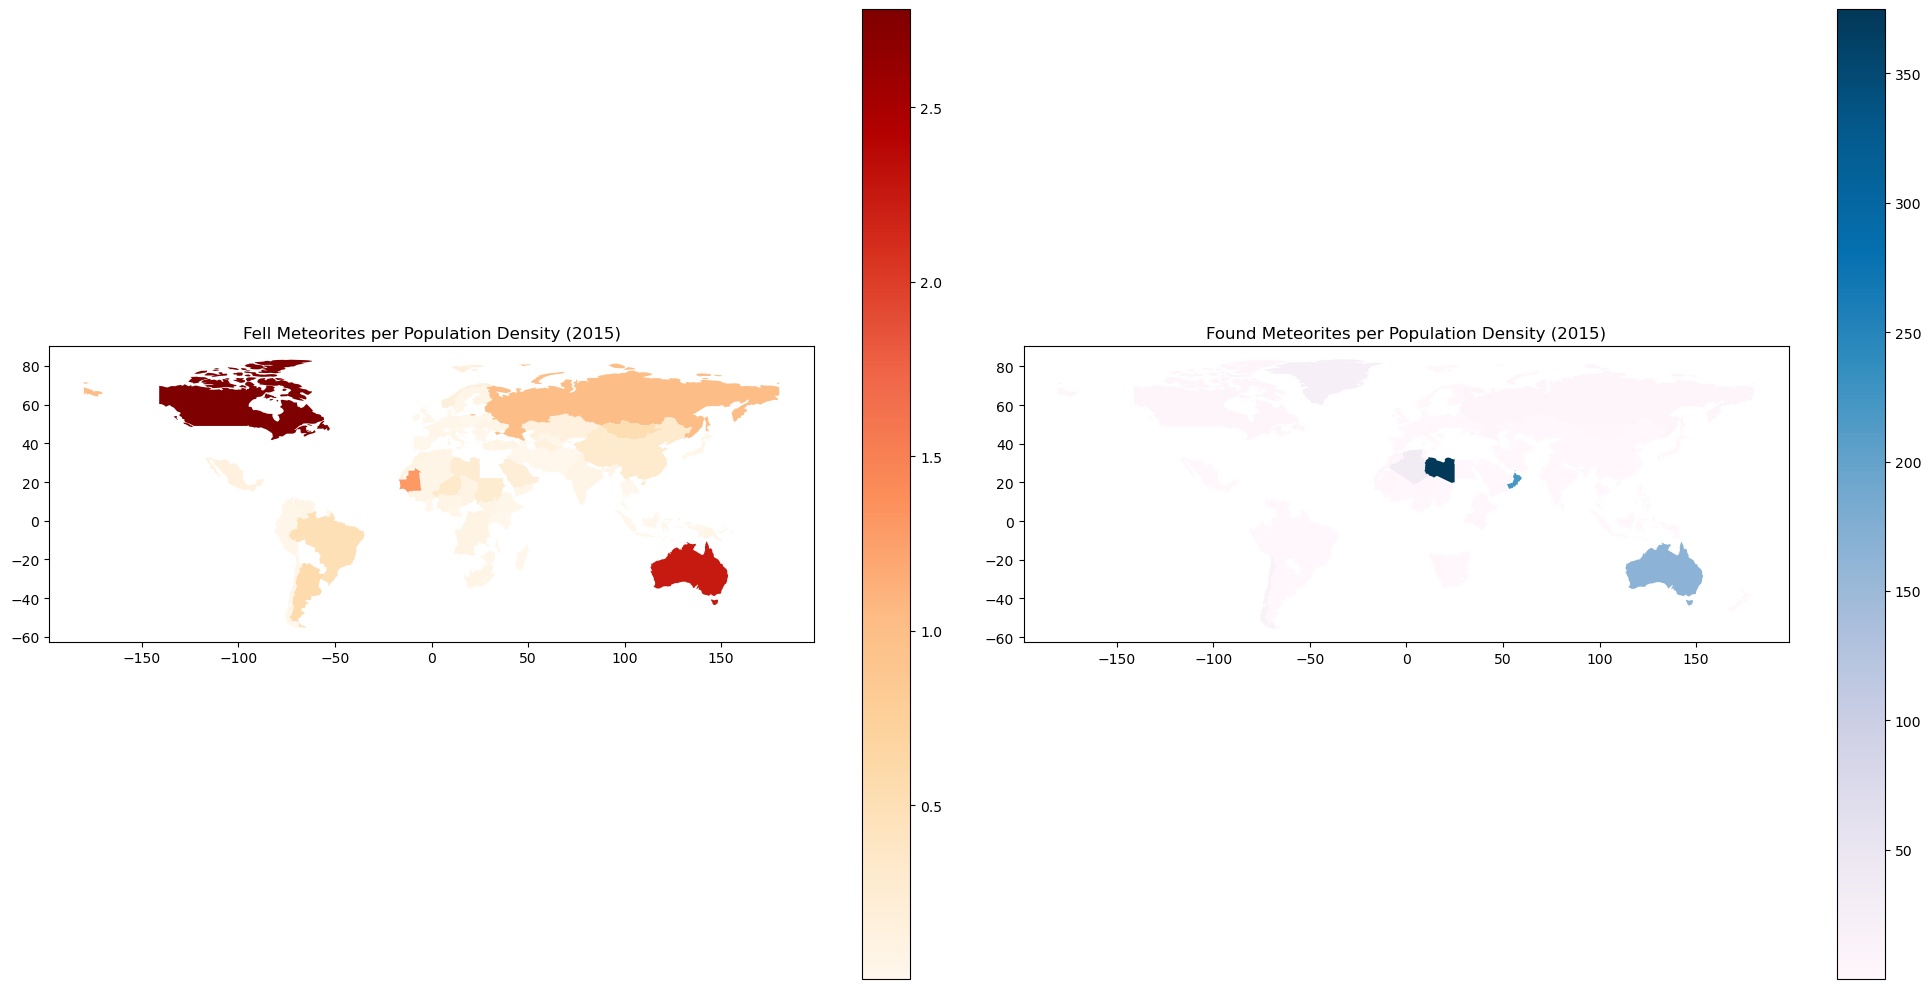

In [13]:
# Calculate number of "fell" and "found" meteorites per country
fell_per_country = pop_met_df[pop_met_df['fall'] == 'Fell'].groupby('country').size().reset_index(name='num_fell')
found_per_country = pop_met_df[pop_met_df['fall'] == 'Found'].groupby('country').size().reset_index(name='num_found')

# Merge with population density data
population_density = pop_met_df[['country', '2015']].drop_duplicates()

# Calculate rates for "fell" and "found"
fell_rate_df = fell_per_country.merge(population_density, on='country', how='left')
fell_rate_df['rate_fell'] = fell_rate_df['num_fell'] / fell_rate_df['2015']

found_rate_df = found_per_country.merge(population_density, on='country', how='left')
found_rate_df['rate_found'] = found_rate_df['num_found'] / found_rate_df['2015']

# Merge the rates into the world shapefile for plotting
world_fell = world.merge(fell_rate_df, left_on='name', right_on='country', how='left')
world_found = world.merge(found_rate_df, left_on='name', right_on='country', how='left')

# Combine "fell" and "found" rates into one DataFrame for combined map
combined_rate_df = fell_rate_df.merge(found_rate_df[['country', 'rate_found']], on='country', how='outer')
combined_rate_df['combined_rate'] = combined_rate_df[['rate_fell', 'rate_found']].sum(axis=1, skipna=True)
world_combined = world.merge(combined_rate_df, left_on='name', right_on='country', how='left')

# Plot separate maps for "fell" and "found"
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# "Fell" meteorites
world_fell.plot(column='rate_fell', cmap='OrRd', legend=True, ax=axes[0])
axes[0].set_title("Fell Meteorites per Population Density (2015)")

# "Found" meteorites
world_found.plot(column='rate_found', cmap='PuBu', legend=True, ax=axes[1])
axes[1].set_title("Found Meteorites per Population Density (2015)")

plt.tight_layout()
plt.show()

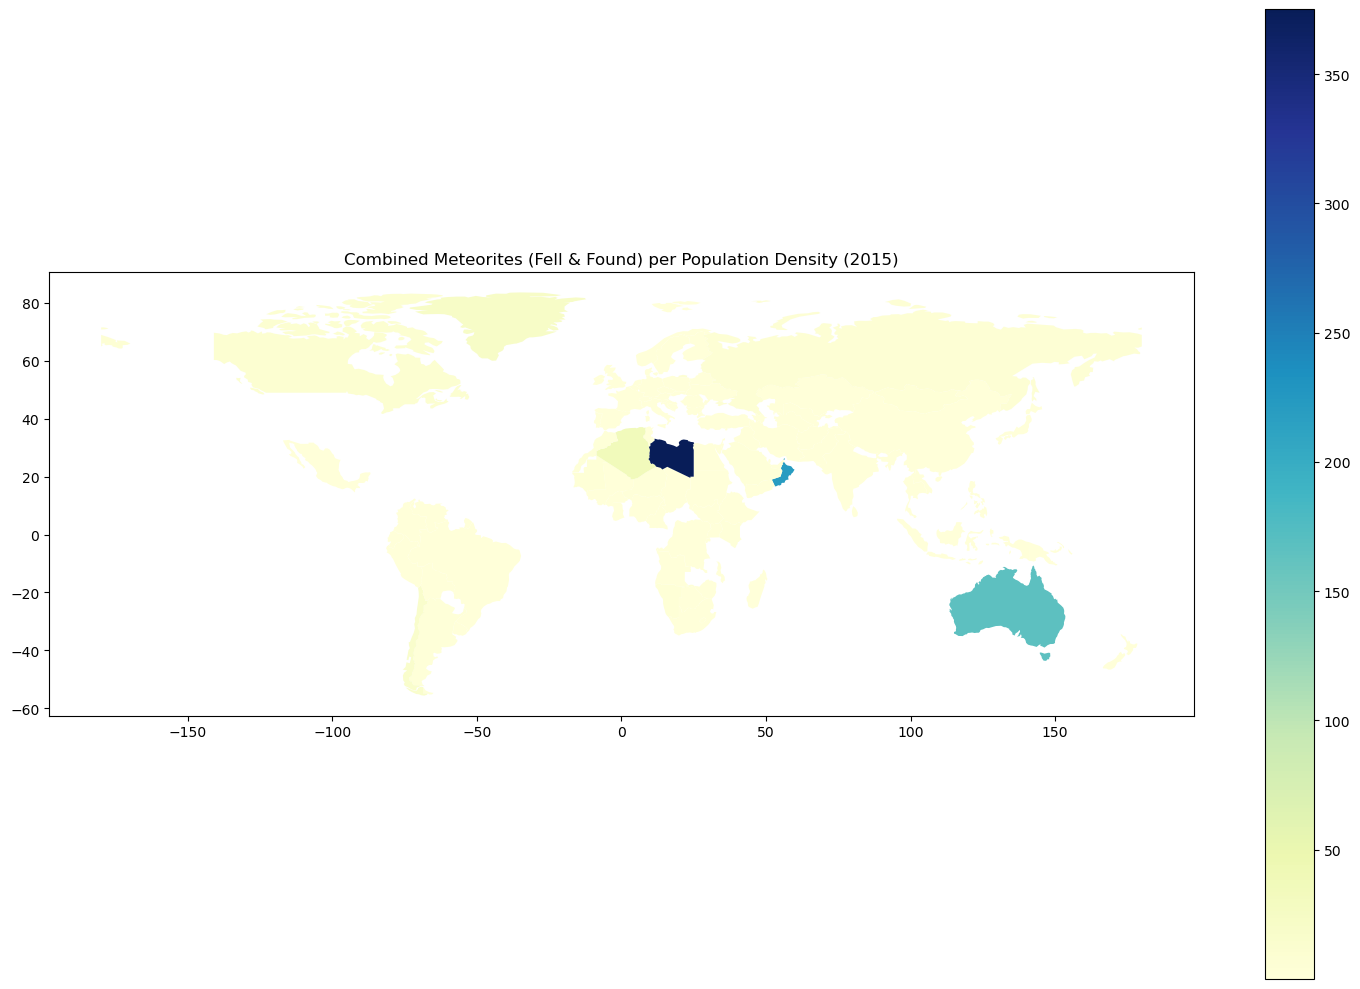

In [14]:
# Plot combined map for "fell" and "found"
fig, ax = plt.subplots(figsize=(15, 10))
world_combined.plot(column='combined_rate', cmap='YlGnBu', legend=True, ax=ax)
ax.set_title("Combined Meteorites (Fell & Found) per Population Density (2015)")

plt.tight_layout()
plt.show()